Before Cleaning:
State_Name         0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Area               0
Production       281
dtype: int64
 Data Cleaned Successfully!
    State_Name District_Name  Crop_Year      Season           Crop     Area  \
22  Tamil Nadu      ARIYALUR       2009      Kharif           Rice  25978.0   
23  Tamil Nadu      ARIYALUR       2009      Kharif  Small millets    404.0   
24  Tamil Nadu      ARIYALUR       2009  Whole Year      Arhar/Tur    160.0   
25  Tamil Nadu      ARIYALUR       2009  Whole Year          Bajra    644.0   
26  Tamil Nadu      ARIYALUR       2009  Whole Year         Banana    134.0   

    Production  
22     80462.0  
23       649.0  
24       122.0  
25      1082.0  
26      5761.0  
(12386, 7)


C:\Users\atchayabaskaran\AppData\Local\Temp\ipykernel_13640\3624213767.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_districts.index, y=top_districts.values, palette="viridis")


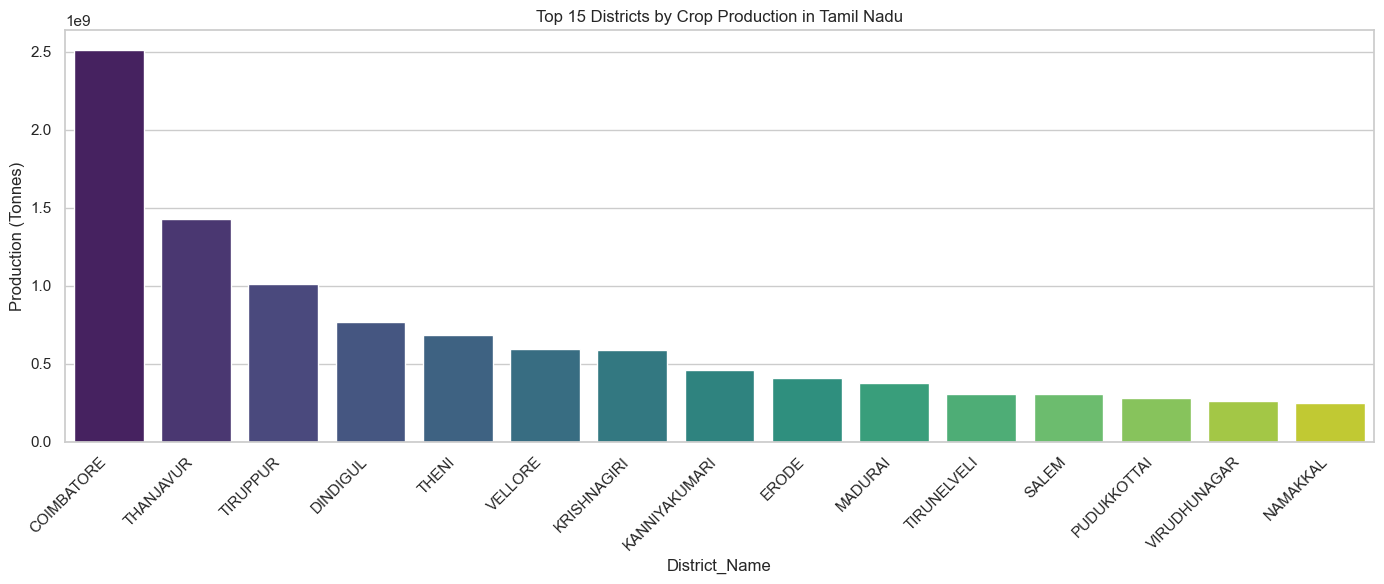

C:\Users\atchayabaskaran\AppData\Local\Temp\ipykernel_13640\3624213767.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crops.index, y=top_crops.values, palette="coolwarm")


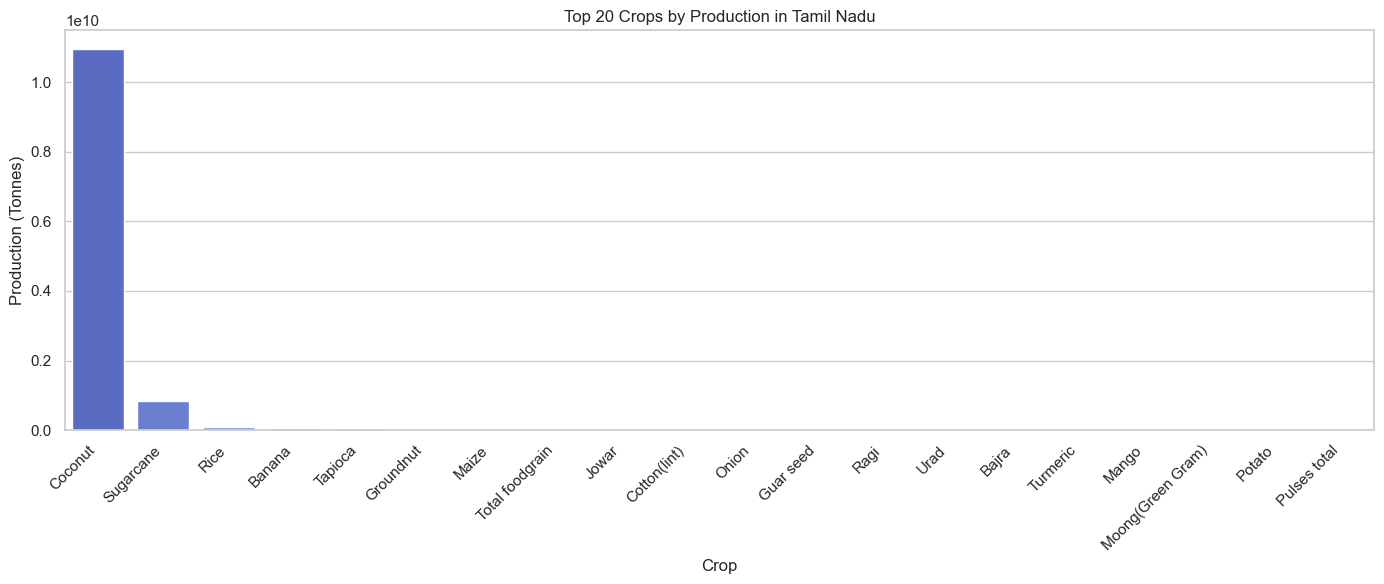

C:\Users\atchayabaskaran\AppData\Local\Temp\ipykernel_13640\3624213767.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_prod.index, y=season_prod.values, palette="magma")


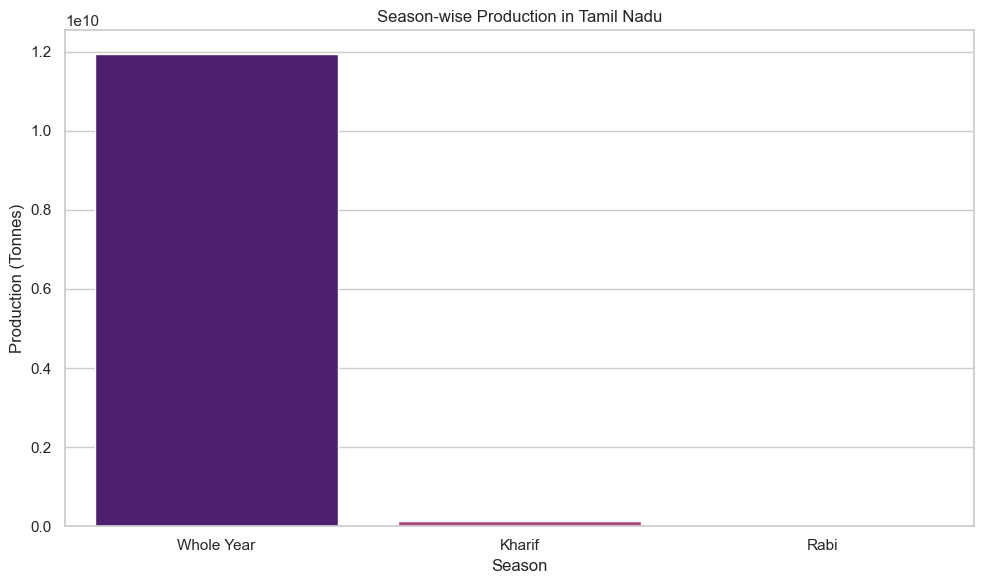

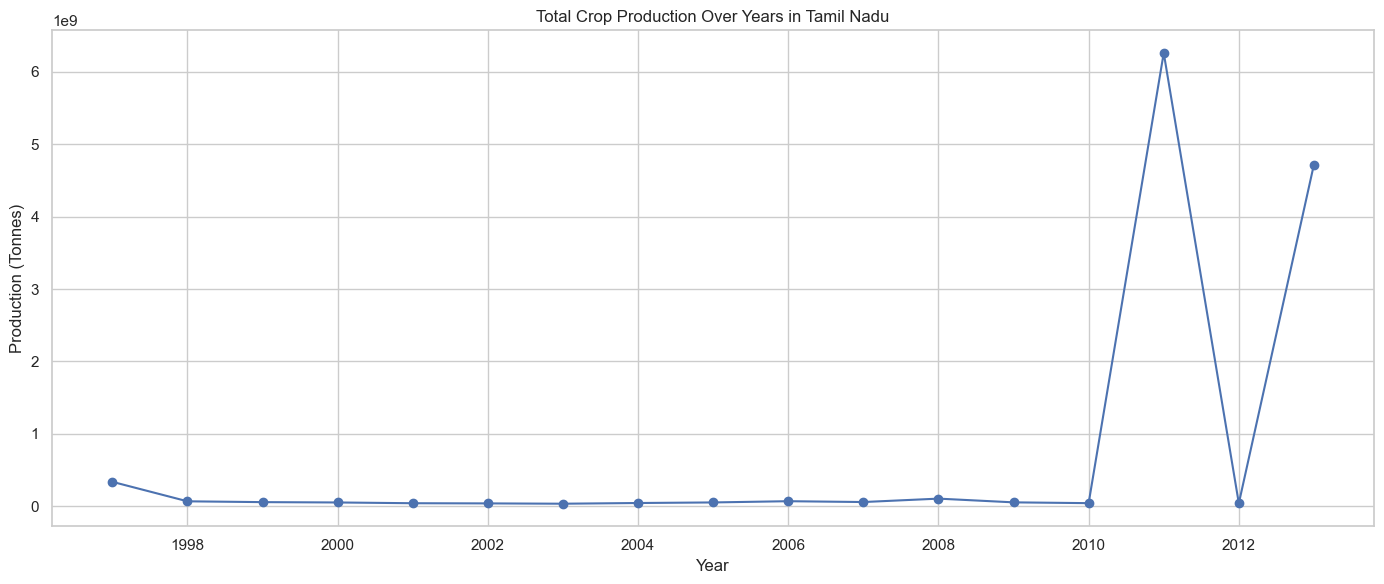

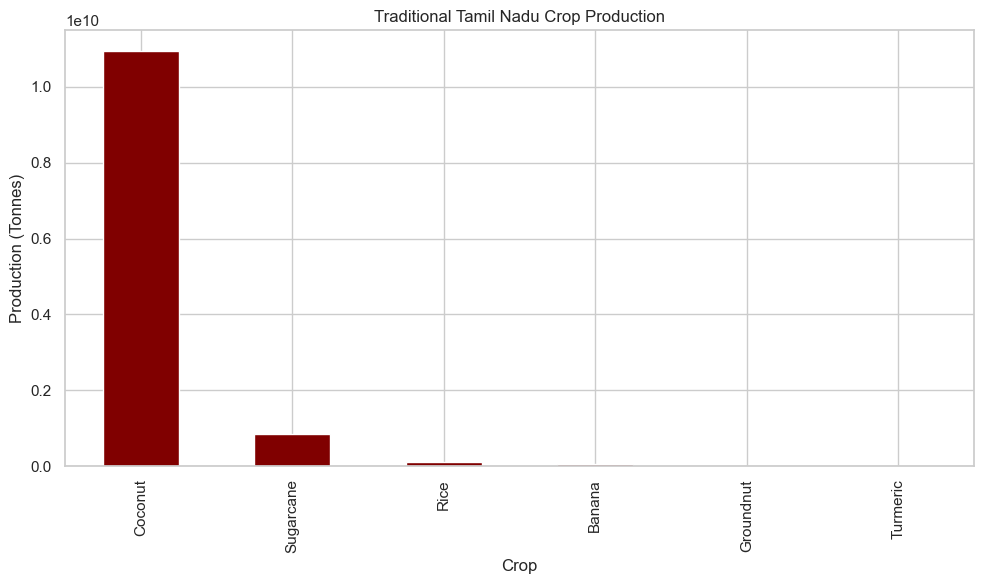

In [1]:
# =========================================
#  Tamil Nadu Agriculture Data Visualization Project
# =========================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Load Dataset
df = pd.read_csv("Tamilnadu agriculture yield data.csv")

#  Data Cleaning Steps
print("Before Cleaning:")
print(df.isnull().sum())

df = df.dropna(subset=['Production', 'Area', 'Crop', 'District_Name', 'Crop_Year'])
df = df.drop_duplicates()

df['Crop_Year'] = df['Crop_Year'].astype(int)
df['Area'] = df['Area'].astype(float)
df['Production'] = df['Production'].astype(float)

df = df[df['Production'] > 0]

df['District_Name'] = df['District_Name'].str.strip()
df['Crop'] = df['Crop'].str.strip()
df['Season'] = df['Season'].str.strip()

print(" Data Cleaned Successfully!")
print(df.head())
print(df.shape)

#  Visualization Theme
sns.set(style="whitegrid")
colors = ["#800000", "#FFD700", "#2E8B57"] # Maroon, Gold, Green (Tamil traditional)

# -------------------------------------------------
#  District-wise Production (Top 15)
# -------------------------------------------------
plt.figure(figsize=(14,6))
top_districts = df.groupby('District_Name')['Production'].sum().sort_values(ascending=False).head(15)
sns.barplot(x=top_districts.index, y=top_districts.values, palette="viridis")
plt.title("Top 15 Districts by Crop Production in Tamil Nadu")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Production (Tonnes)")
plt.tight_layout()
plt.show()

# -------------------------------------------------
#  Top 20 crops production
# -------------------------------------------------
plt.figure(figsize=(14,6))
top_crops = df.groupby('Crop')['Production'].sum().sort_values(ascending=False).head(20)
sns.barplot(x=top_crops.index, y=top_crops.values, palette="coolwarm")
plt.title("Top 20 Crops by Production in Tamil Nadu")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Production (Tonnes)")
plt.tight_layout()
plt.show()

#  Updated Seasonal Visualization - Bar Chart
season_prod = df.groupby('Season')['Production'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=season_prod.index, y=season_prod.values, palette="magma")
plt.title("Season-wise Production in Tamil Nadu")
plt.ylabel("Production (Tonnes)")
plt.xlabel("Season")
plt.tight_layout()
plt.show()

# -------------------------------------------------
# Year-wise Production (Line Chart)
# -------------------------------------------------
year_prod = df.groupby('Crop_Year')['Production'].sum().sort_index()

plt.figure(figsize=(14,6))
plt.plot(year_prod.index, year_prod.values, marker='o')
plt.title("Total Crop Production Over Years in Tamil Nadu")
plt.xlabel("Year")
plt.ylabel("Production (Tonnes)")
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------------------------
#  Tamil Traditional Crops Comparison
# -------------------------------------------------
traditional_crops = ['Rice', 'Coconut', 'Sugarcane', 'Banana', 'Turmeric', 'Groundnut']
trad_df = df[df['Crop'].isin(traditional_crops)]
trad_prod = trad_df.groupby('Crop')['Production'].sum().sort_values(ascending=False)

sns.set_palette(colors)
plt.figure(figsize=(10,6))
trad_prod.plot(kind='bar')
plt.title("Traditional Tamil Nadu Crop Production")
plt.ylabel("Production (Tonnes)")
plt.xlabel("Crop")
plt.tight_layout()
plt.show()
